## 1. Descriptive Statistics

##### Import neccessary python liberaries

In [2]:
import os
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

sys.path.insert(0, os.path.dirname(os.getcwd()))

from scripts.text_analysis import TextAnalysis

In [3]:
# file path
file_path='../data/raw_analyst_ratings.csv'
# create an object
ta=TextAnalysis(file_path)

In [4]:
ta.load_data()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [5]:
# Drop column name "Unnamed" because it is an index column
ta.drop_unnamed_column()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [6]:
ta.check_data_quality()

Missing values:
headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

 Number of duplicates: 1

 Data types:
headline     object
url          object
publisher    object
date         object
stock        object
dtype: object


#### Headline Length

In [7]:
ta.headline_length_stats()

Headline Length Statistics:


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

#### Number of Articles per publisher 

In [9]:
ta.article_per_publisher()

Article Counts per Publisher:


,Publisher,Article Count
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
...,...,...
1029,MoneyGeek,1
1030,muathe,1
1031,Robert Morris,1
1032,LeftCoastHedgie,1


#### Publication Dates Analysis

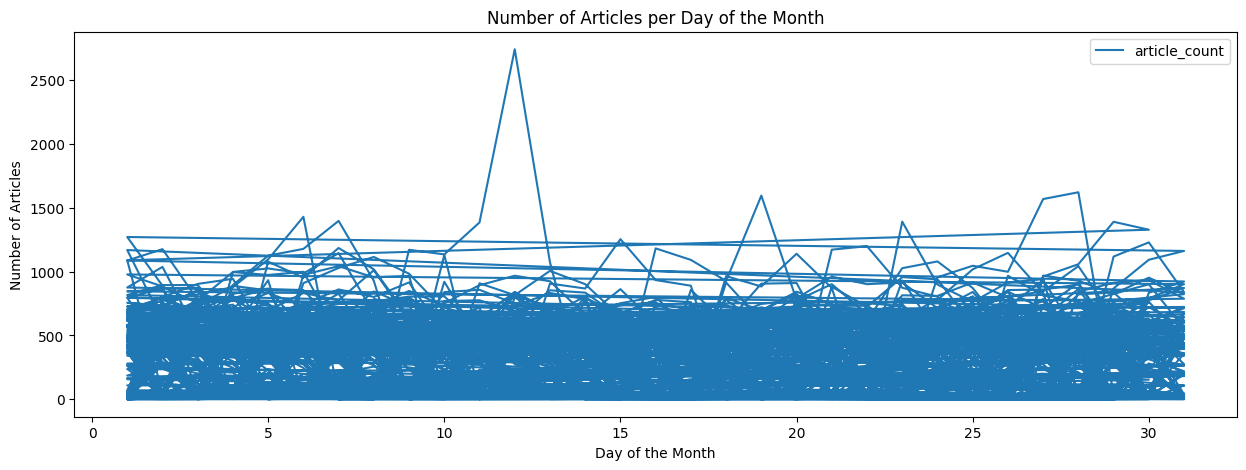

In [10]:
ta.publication_dates_analysis()

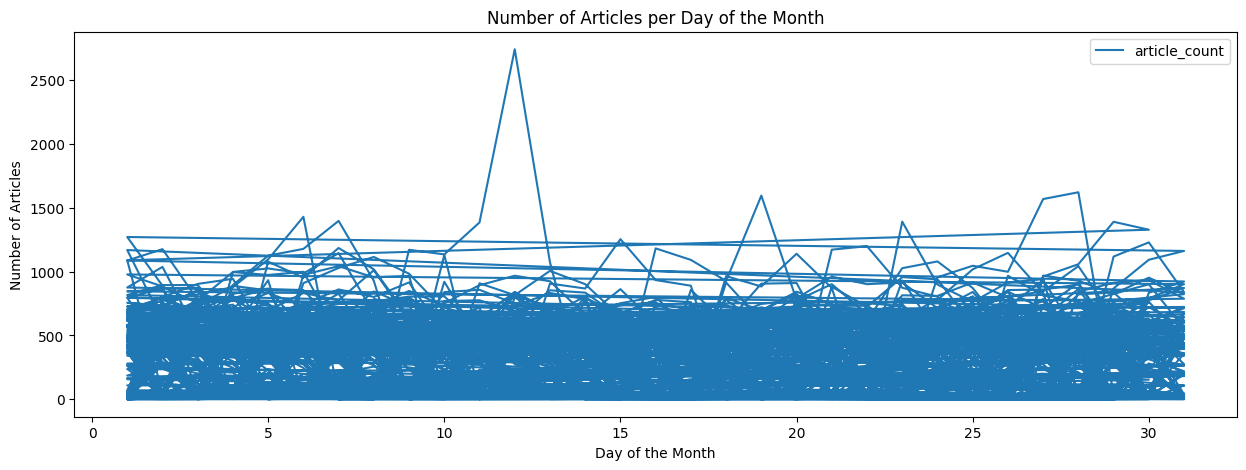

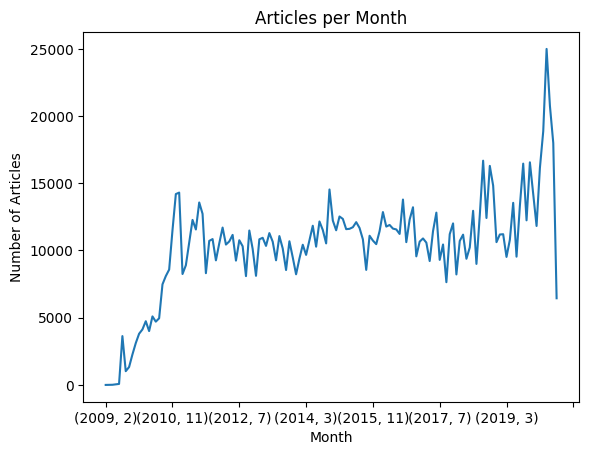

In [13]:
ta.publication_frequency_over_time()

## 2. Sentiment Analysis and Text Modeling

### Sentiment Analysis

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Getahun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
cleand_data=ta.text_preprocess()
cleand_data

In [4]:
# df=ta.text_preprocess()
result=ta.get_sentiment()
result

,Unnamed: 0,headline,url,publisher,date,stock,polarity,sentiment
0,0,stocks hit week highs friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.00,Neutral
1,1,stocks hit week highs wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.00,Neutral
2,2,biggest movers friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.00,Neutral
3,3,stocks moving fridays midday session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.00,Neutral
4,4,b securities maintains neutral agilent technol...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.00,Neutral
...,...,...,...,...,...,...,...,...
1407323,1413844,top narrow based indexes august,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,0.15,positive
1407324,1413845,recap wednesdays top percentage gainers losers,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,0.15,positive
1407325,1413846,update oppenheimer color china zenix auto init...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,0.00,Neutral
1407326,1413847,oppenheimer initiates china zenix outperform pt,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,0.00,Neutral


sentiment
Neutral     969425
positive    329714
Negative    108189
Name: count, dtype: int64


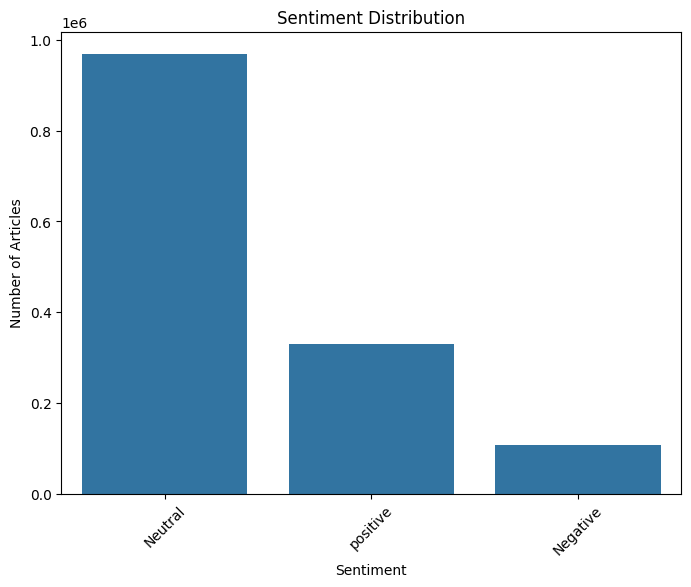

In [5]:
# df['setimern_catagory'].value_counts().plot(kind='bar',figsize=(10,6),color='r')
ta.plot_sentiment_distribution()

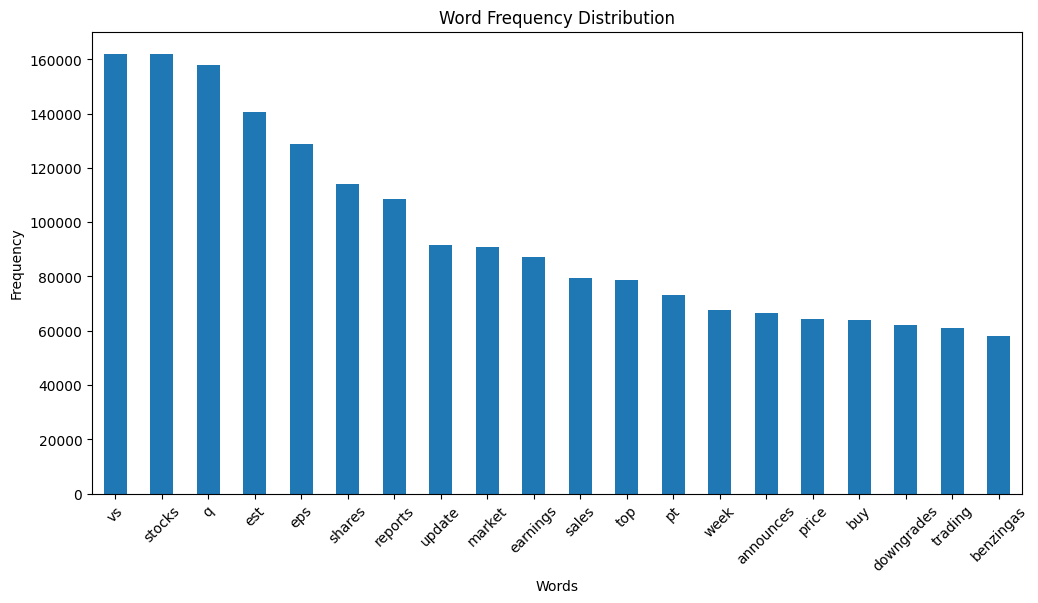

In [6]:
ta.word_frequency()

## 3. Time Series Analysis
### a. Publication Frequency Over Time

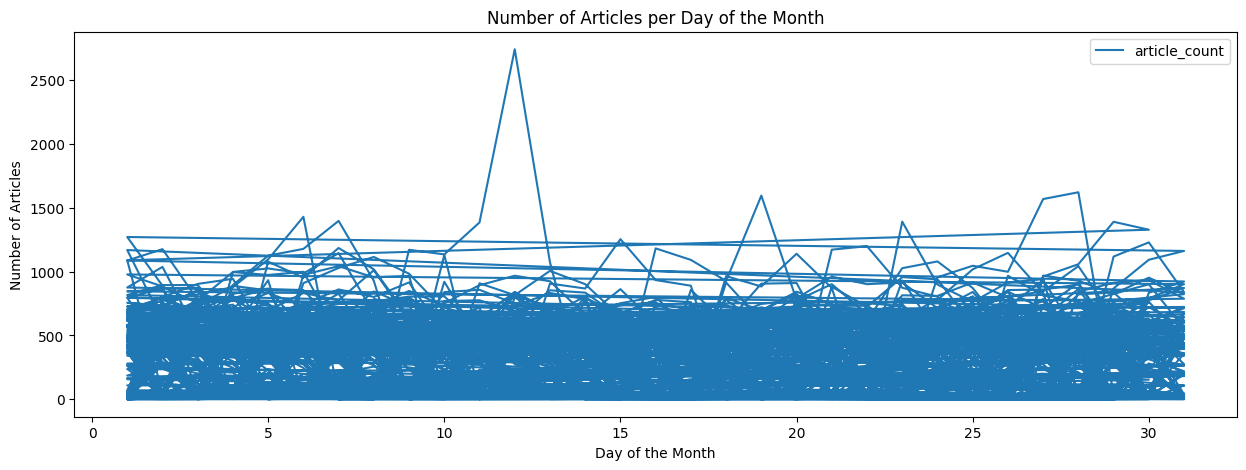

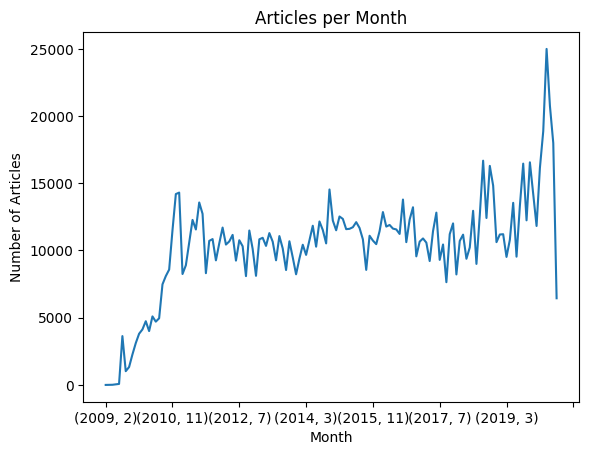

In [14]:
ta.publication_frequency_over_time()

## 4. Publisher Analysis

In [8]:
# Count number of articles per publisher
ta.article_per_publisher()

Article Counts per Publisher:


,Publisher,Article Count
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
...,...,...
1029,MoneyGeek,1
1030,muathe,1
1031,Robert Morris,1
1032,LeftCoastHedgie,1


Article Counts per Publisher:


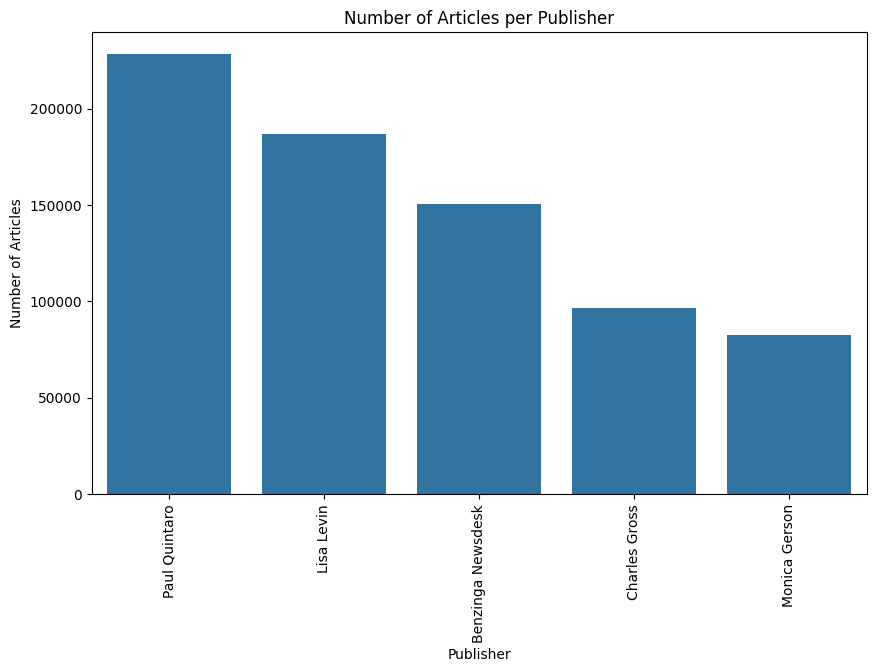

In [7]:
#Top 5 Publishers in the article
ta.plot_article_per_publisher()

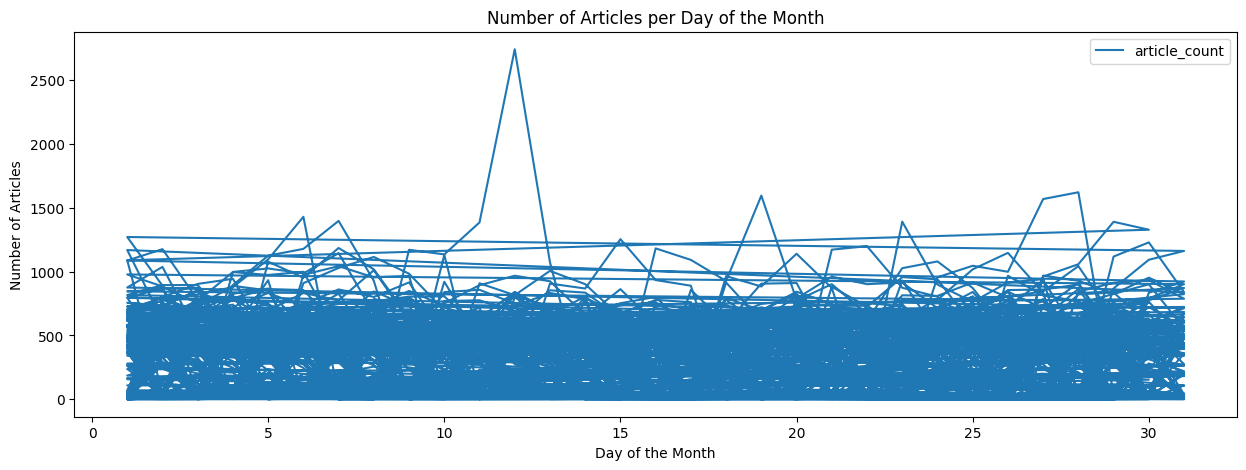

In [10]:
ta.publication_dates_analysis()

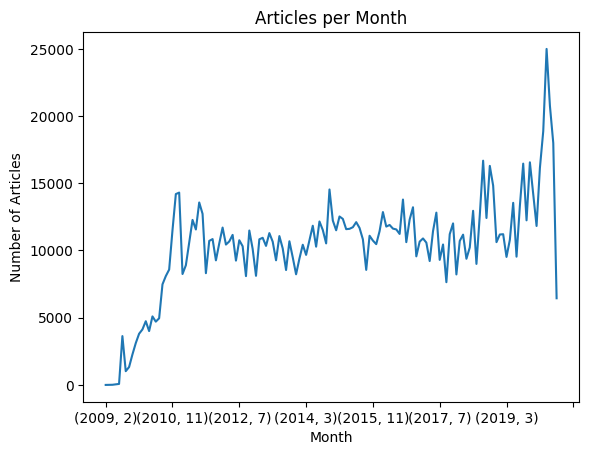

In [11]:
ta.publication_frequency_over_time()

### Unique Domains from Email Addresses

In [15]:
# identify unique domains from a list of email addresses
unique_domain=ta.unique_domains_from_emails()
unique_domain.to_frame().reset_index().rename(columns={'index': 'Domain', 0: 'Count'})

,domain,count
0,benzinga.com,7937
1,gmail.com,139
2,andyswan.com,5
3,investdiva.com,2
4,tothetick.com,2
5,eosdetroit.io,1
6,forextraininggroup.com,1
7,stockmetrix.net,1


<Axes: xlabel='domain'>

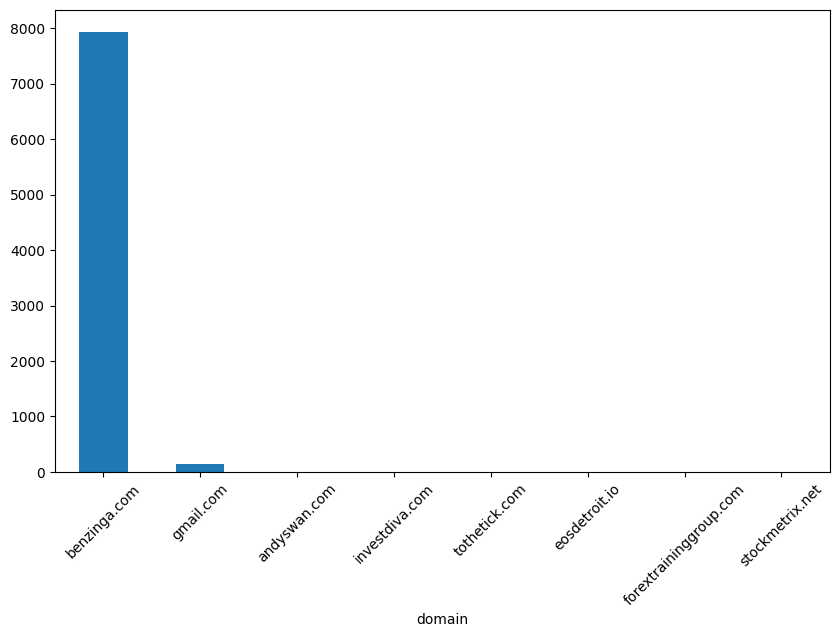

In [16]:
unique_domain.plot(kind='bar', rot=45, figsize=(10, 6))

In [17]:
# topic modeling
ta.topic_modeling()

6204